In [1]:
import seaborn as sns

import numpy as np
import torch
sns.set_theme()

In [ ]:
input_size = 10
hidden_size = 5
output_size = 1

X = torch.randn(100, input_size)  # 100 samples, 10 time steps
y = torch.randn(100, output_size)

W1 = torch.randn(hidden_size, input_size).requires_grad_()
b1 = torch.zeros(hidden_size,  requires_grad=True)
W2 = torch.randn(output_size, hidden_size).requires_grad_()
b2 = torch.zeros(output_size,  requires_grad=True)


def simple_neural_net(x, W1, b1, W2, b2):
    z1 = torch.mm(x, W1.t()) + b1  # (100 x input_size) * (input_size x hidden_size) + (hidden_size) = (100 x hidden_size)
    a1 = torch.sigmoid(z1)  # (100 x hidden_size)
    z2 = torch.mm(a1, W2.t()) + b2 # (100 x hidden_size) * (hidden_size x output_size) + (output_size) = (100 x output_size)
    return z2

<Axes: ylabel='None'>

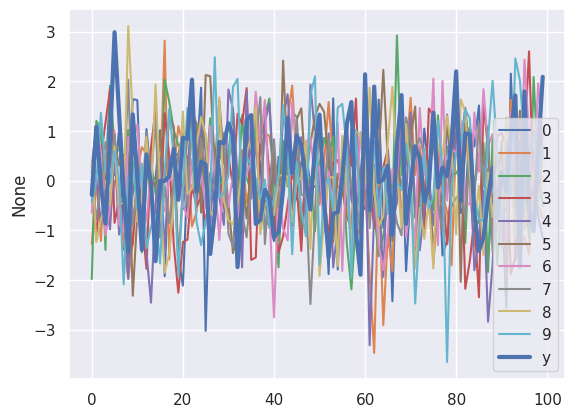

In [22]:
for i in range(10):
    sns.lineplot(x=np.arange(100), y=X[:,i], label=f"{i}")
sns.lineplot(x=np.arange(100), y=y.reshape(-1), label='y', lw=3)

In [26]:
lr = 0.01
epochs = 100

loss_fn = torch.nn.MSELoss()

for epoch in range(epochs):
    y_pred = simple_neural_net(X, W1, b1, W2, b2)
    loss = loss_fn(y_pred.squeeze(), y)

    loss.backward()

    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 50 == 0:
        print(f'Epoch: {epoch} \t Loss: {loss.item()}')

Epoch: 0 	 Loss: 1.568274736404419
Epoch: 50 	 Loss: 1.250158429145813


/home/volody/code/study-py/ts-pytorch/.venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


<Axes: >

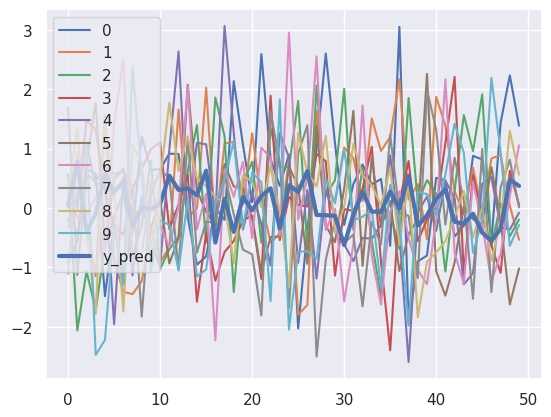

In [19]:
num_pred = 50
X_pred = torch.randn(num_pred, input_size)  # 100 samples, 10 time steps
y_pred = simple_neural_net(X_pred, W1, b1, W2, b2)

X_pred_np = X_pred.detach().numpy()
y_pred_np = y_pred.detach().numpy()

for i in range(10):
    sns.lineplot(x=np.arange(num_pred), y=X_pred_np[:,i], label=f"{i}")
sns.lineplot(x=np.arange(num_pred), y=y_pred_np.reshape(-1), label='y_pred', lw=3)